### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

a) Найти наиболее похожего пользователя по косинусной метрике для каждого 

*Ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).*

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import minimize
import nltk
%matplotlib inline

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [10]:
def cosine (user1, user2): # расчет косинуса между векторами
    
    return np.dot(user1, user2) / math.sqrt(np.dot(user1, user1)) / math.sqrt(np.dot(user2, user2))

In [32]:
user_cos = {} # словарь пар юзеров с оценкой косинусной меры между их оценками
a = 0

for i in raitings:
    a += 1
    b = 0
    for user_comp in raitings:
        b += 1
        user_cos[a, b] = cosine(i, user_comp)

In [31]:
count = 1
max_ = 0
user_best = {}

for x, y in user_cos.items(): # поиск пары с максимальным косинусом
    if x[0] != count:
        count = x[0]
        max_ = 0
    if y > max_ and x[0] != x[1]:
            max_ = y
            user_best[x[0]] = x[1]
user_best

{1: 9, 2: 5, 3: 10, 4: 10, 5: 9, 6: 10, 7: 4, 8: 6, 9: 1, 10: 3}

#### b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [52]:
disp = np.var(raitings, axis=0) # определяем дисперсию оценок для каждого фильма
disp # чем больше дисперсия, тем больше оценки этого фильма нам подходят для описания пользователей

array([ 7.29,  8.89,  3.84,  4.61,  7.24,  2.4 , 11.25,  6.6 , 10.  ,
        8.45, 12.64,  7.64,  5.89,  9.49,  6.56])

In [84]:
i_max_disp = np.argpartition(disp, 10)[0:10] # ищем индексы с наименьшей дисперсией 
i_max_disp

array([ 5, 14,  2,  3, 12,  7,  0,  4, 11,  9])

In [85]:
q = np.delete(raitings, [i_max_disp], axis=1) # удаляем из 15 признаков 10 с наименьшей дисперсией
q

array([[ 4, 10,  9,  9,  6],
       [ 2, 10,  6,  1,  9],
       [ 6,  3, 10,  2,  1],
       [ 1,  2,  5,  6,  2],
       [ 7,  9,  2,  1, 10],
       [ 3,  1,  8,  1, 10],
       [ 8,  6,  1,  9,  7],
       [ 1,  4,  2,  7,  8],
       [ 7,  8,  8, 10, 10],
       [10,  2,  9,  8,  6]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге 

*просто подставить точку в производную и ничего не упрощать*

In [135]:
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative

1. u = tan(sin(x) + cos(2x + 3))

2. d/dx u^2 = 2u

3. d/dx tan (sin(x) + cos(2x + 3))...

    3.1 tan (sin(x) + cos(2x + 3)) = sin(sin(x) + cos(2x + 3))/cos(sin(x) + cos(2x + 3))

    3.2 f(x) = sin(sin(x) + cos(2x + 3)), g(x) = cos(sin(x) + cos(2x + 3))

        3.2.1 u = sin(x) + cos(2x + 3)
        
        3.2.2 d/du sin(u) = cos(u), d/du cos(u) = -sin(u)
        
        3.2.3 d/dx(2x + 3) = 2*1 + 0 = 2
        
        3.2.4 d/dx (sin(x) + cos(2x + 3)) = -2sin(2x + 3) + cos(x)
     
     3.3 d/dx f(x) = (-2sin(2x + 3) + cos(x)) * cos(sin(x) + cos(2x + 3))
        d/dx g(x) = -(-2sin(2x + 3) + cos(x)) * sin(sin(x) + cos(2x + 3))
        
4. Правило: 
d/dx f(x)/g(x) = (-f(x) * d/dx g(x) + g(x) * d/dx f(x)) / g(x)**2

z = (
(-2sin(2x + 3) + cos(x)) * sin^2(sin(x) + cos(2x + 3)) + 
    
(-2sin(2x + 3) + cos(x)) * cos^2(sin(x) + cos(2x + 3))) /
    
cos^2(sin(x) + cos(2x + 3)
)

5. 2 * z * tan(sin(x) + cos(2x + 3))

In [142]:
# подставляем в формулу производной значение x
x = 1
z = (((-2*np.sin(2*x + 3) + np.cos(x)) * (np.sin(np.sin(x) + np.cos(2*x + 3)))**2 + 

      (-2*np.sin(2*x + 3) + np.cos(x)) * (np.cos(np.sin(x) + np.cos(2*x + 3)))**2) / 
      
      (np.cos(np.sin(x) + np.cos(2*x + 3))**2))

2 * z * np.tan(np.sin(x) + np.cos(2*x + 3))



55.38591763533796

In [114]:
# проверка формулы
x = symbols('x')

diff(tan(sin(x) + cos(2*x + 3))**2) # производная функция

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [111]:
# проверка расчета производной в точке x=1
def f(x):
    return (tan(sin(x) + cos(2*x + 3)))**2

derivative(f, 1.0, dx=1e-6)

55.3859176433136

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [178]:
def f(x, a, b):
    
    return np.e**a * np.sin(b*x) + x

In [268]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [269]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

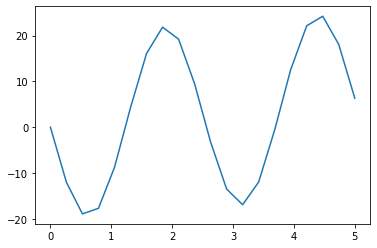

In [181]:
plt.plot(x, fx)
plt.show()

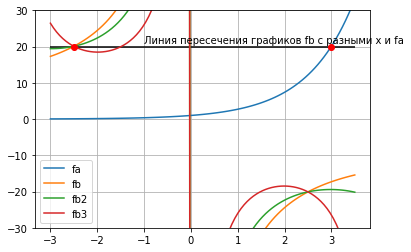

In [471]:
a = np.linspace(-3, 3.5, 100)

fa = np.e**a
fb = (fx[1]-x[1]) / np.sin(a*x[1])
fb3 = (fx[3]-x[3]) / np.sin(a*x[3])
fb2 = (fx[2]-x[2]) / np.sin(a*x[2])

plt.plot(a, fa, label='fa')
plt.hlines(20, -3, 3.5)
plt.plot(a, fb, label='fb')
plt.plot(a, fb2, label='fb2')
plt.plot(a, fb3, label='fb3')
plt.text(-1, 21,'Линия пересечения графиков fb с разными x и fa')
plt.plot([-2.5, 3],[20, 20],'ro')

plt.ylim(-30, 30)
plt.grid()
plt.legend()
plt.show()

In [182]:
def error(params):
    
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [254]:
a = np.arange(-4, 4, 0.1)

In [264]:
q0 = 1000
z = []
for i in a:
    for ii in a:
        q = error([i, ii])
        if q < q0:
            q0 = q
            z = [i, ii]
print('Значение абсолютной ошибки минимально:', error(z), ', при значениях a и b:', z)

Значение абсолютной ошибки минимально: 1.516327977846288e-06 , при значениях a и b: [3.000000000000006, -2.4999999999999987]


### Задание 4

1. Создайте собственную дискретную случайную величину с 20 значениями. 
2. Сгенерируйте 1000 выборок размера 50. 
3. Посчитайте среднее для каждой выборки. 
4. Постройте гистограмму распределения средних.

In [515]:
import random

# Создайте собственную дискретную случайную величину с 20 значениями: 
random_var = [random.randint(0, 20) for x in range(500)]
 
means = []

for x in range(1000):
    
    # Сгенерируйте 1000 выборок размера 50
    sample = random.sample(random_var, 50)
    
    # Посчитайте среднее для каждой выборки 
    mean = sum(sample)/50
    
    # Накопление данных
    means.append(mean)

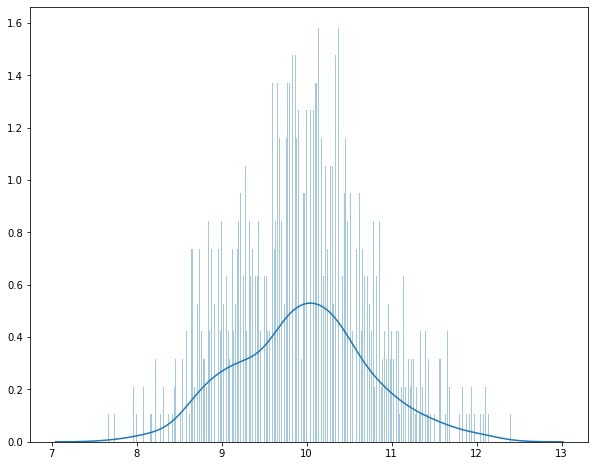

In [520]:
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches(10, 8)

sns_plot = sns.distplot(means, 500)
#fig = sns_plot.get_figure()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)


In [478]:
matrix = np.array([[1, 4], [1, 1]])

A = (1 4)
    (1 1)
1. Умножим на неизвестный вектор [x y]
x + 4y = Lx

x + y = Ly

2. Перенесем налево
x - Lx + 4y = 0

x + y - Ly = 0

3. x и y за скобки
(1 - L)x + 4y = 0

x + (1 - L)y = 0

4. Раскроем определитель и решим уравнение
(1-L)(1-L) - 1 * 4 = 0

L^2 - 2L - 3 = 0

5. Считаем дискриминант
D = (-2)^2 - 4*1*(-3) = 4 + 12 = 16

6. Найдём собственные значения
y1 = (корень из D - b) / 2a

y2 = (-корень из D - b) / 2a

y1 = (4 - (-2)) / (2*1) = 6 / 2 = 3

y2 = (-4 - (-2)) / (2*1) = -2 / 2 = -1

7. Подставляем y1 в формулы п.3 и считаем собственный вектор1
-2x + 4y = 0 -2x = -4y

x - 2y = 0 

В обоих уравнениях: x = 2y

x = 2, y = 1 - первый собственный вектор

8. Подставляем y2 в формулы п.3 и считаем собственный вектор2
2x + 4y = 0 2x = -4y

x + 2y = 0 

В обоих уравнениях: x = -2y

x = -2, y = 1 - второй собственный вектор


In [481]:
w, v = np.linalg.eig(matrix)
v

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [485]:
for i in range(len(w)):
    
    print("Собственное значение " + str(round(w[i], 1)))
    print("Соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0
Соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -1.0
Соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
